<a href="https://colab.research.google.com/github/juanpimedicen/Challenge_TelecomX/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [60]:
import pandas as pd
import requests

## Guardar el archivo desde la API en una variable manejable

In [61]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [62]:
resp = requests.get(url)
data= resp.json()

In [63]:
df = pd.json_normalize(data)
df.columns = [c.replace('.', '_') for c in df.columns]
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Analizando y transformando el DataFrame

In [64]:
#Mostrar dimensiones del DataFrame
print(f"🔎 Dimensiones del DataFrame: {df.shape}")

#Nombres de columnas y tipos de datos
print("\n📋 Tipos de datos por columna:")
print(df.info())

#Verificar calores nulos
print("\n🧼 Conteo de valores nulos por columna:")
print(df.isnull().sum())

# Estadísticas descriptivas para columnas numéricas
print("\n📊 Estadísticas descriptivas:")
print(df.describe())

# Ver algunos valores únicos por columna categórica
print("\n🔠 Valores únicos por algunas columnas:")
for col in df:
    print(f"{col}: {df[col].unique()}")

🔎 Dimensiones del DataFrame: (7267, 21)

📋 Tipos de datos por columna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 n

In [65]:
# Ver columnas disponibles
print("📌 Columnas en el DataFrame:")
print(df.columns.tolist())

📌 Columnas en el DataFrame:
['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges_Monthly', 'account_Charges_Total']


In [66]:
# Limpiar espacios en los nombres de columnas
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [67]:
# Renombrar columnas clave para facilitar su uso
df.rename(columns={
    'customerid': 'customer_id',
    'customer_gender': 'gender',
    'customer_seniorcitizen': 'senior_citizen',
    'customer_partner': 'partner',
    'customer_dependents': 'dependents',
    'customer_tenure': 'tenure',
    'phone_phoneservice': 'phone_service',
    'phone_multiplelines': 'multiple_lines',
    'internet_internetservice': 'internet_service',
    'internet_onlinesecurity': 'online_security',
    'internet_onlinebackup': 'online_backup',
    'internet_deviceprotection': 'device_protection',
    'internet_techsupport': 'tech_support',
    'internet_streamingtv': 'streaming_tv',
    'internet_streamingmovies': 'streaming_movies',
    'account_contract': 'contract',
    'account_paperlessbilling': 'paperless_billing',
    'account_paymentmethod': 'payment_method',
    'account_charges_monthly': 'monthly_charges',
    'account_charges_total': 'total_charges',
    'churn': 'churn'
}, inplace=True)

In [68]:
# Verificar nombres finales
print("✅ Columnas después del renombrado:")
print(df.columns.tolist())

✅ Columnas después del renombrado:
['customer_id', 'churn', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges']


In [69]:
# Revisión de valores únicos en columnas categóricas clave
cols_categoricas = ['gender', 'partner', 'dependents', 'phone_service', 'internet_service', 'contract', 'churn']
print("Columnas: Valores únicos")
for col in cols_categoricas:
    if col in df.columns:
        print(f"{col}: {df[col].unique()}")
    else:
        print(f"❌ La columna '{col}' no está presente.")

Columnas: Valores únicos
gender: ['Female' 'Male']
partner: ['Yes' 'No']
dependents: ['Yes' 'No']
phone_service: ['Yes' 'No']
internet_service: ['DSL' 'Fiber optic' 'No']
contract: ['One year' 'Month-to-month' 'Two year']
churn: ['No' 'Yes' '']


##Organizar y limpiar datos

In [70]:
import numpy as np

df['churn'] = df['churn'].replace('', np.nan)

In [71]:
print("🔎 Validamos nuevamente Valores nulos por columna:")
print(df.isnull().sum())

🔎 Validamos nuevamente Valores nulos por columna:
customer_id            0
churn                224
gender                 0
senior_citizen         0
partner                0
dependents             0
tenure                 0
phone_service          0
multiple_lines         0
internet_service       0
online_security        0
online_backup          0
device_protection      0
tech_support           0
streaming_tv           0
streaming_movies       0
contract               0
paperless_billing      0
payment_method         0
monthly_charges        0
total_charges          0
dtype: int64


In [72]:
# Eliminar filas sin valor en churn y mostrar nuevas dimensiones del df
df_clean = df.dropna(subset=['churn'])
print(f"✅ Nuevas dimensiones del dataset: {df_clean.shape}")

✅ Nuevas dimensiones del dataset: (7043, 21)


#🔧 Transformación

## Actividades:
✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión.

In [73]:
# Selección de columnas relevantes para el análisis de churn
cols_relevantes = ['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
    'phone_service', 'multiple_lines', 'internet_service', 'online_security',
    'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
    'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
    'monthly_charges', 'total_charges', 'churn']

In [74]:
# Crear nuevo DataFrame con solo las columnas seleccionadas
df_relevante = df_clean[cols_relevantes].copy()

In [75]:
# Confirmar que no haya valores nulos en las columnas seleccionadas
print("\n🔍 Revisión de valores nulos:")
print(df_relevante.isnull().sum())


🔍 Revisión de valores nulos:
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64


In [76]:
print("🔍 Valores vacíos como string:")
for col in df_relevante.columns:
    vacios = (df_relevante[col] == '').sum()
if vacios > 0:

  print(f"{col}: {vacios} valores vacíos")
else:
  print("No hay valores vacíos como string")


🔍 Valores vacíos como string:
No hay valores vacíos como string


In [77]:
# Revisar tipos de datos
print("\n📋 Tipos de datos por columna:")
print(df_relevante.dtypes)


📋 Tipos de datos por columna:
gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges         object
churn                 object
dtype: object


In [78]:
# Convertir total_charges a numérico (en algunos casos puede estar como string)
df_relevante['total_charges'] = pd.to_numeric(df_relevante['total_charges'], errors='coerce')

In [79]:
import numpy as np

# Reemplazar strings vacíos por NaN
df_relevante.replace('', np.nan, inplace=True)

# Convertir total_charges a float
df_relevante['total_charges'] = pd.to_numeric(df_relevante['total_charges'], errors='coerce')


# Mostrar valores nulos tras la conversión
print("🔍 Valores nulos después de reemplazo y conversión:")
print(df_relevante.isnull().sum())

🔍 Valores nulos después de reemplazo y conversión:
gender                0
senior_citizen        0
partner               0
dependents            0
tenure                0
phone_service         0
multiple_lines        0
internet_service      0
online_security       0
online_backup         0
device_protection     0
tech_support          0
streaming_tv          0
streaming_movies      0
contract              0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
churn                 0
dtype: int64


In [80]:
# Eliminar registros donde churn o total_charges estén vacíos
df_relevante.dropna(subset=['churn', 'total_charges'], inplace=True)

# Resetear el índice por orden
df_relevante.reset_index(drop=True, inplace=True)

# Confirmar el tamaño final del dataset
print(f"\n✅ Dimensiones finales del dataset limpio: {df_relevante.shape}")


✅ Dimensiones finales del dataset limpio: (7032, 20)


##Limpiando categorías

In [81]:
print("\n🔎 Valores únicos por variable categórica:")
categorical_columns = df_relevante.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"{col}: {df_relevante[col].unique()}")


🔎 Valores únicos por variable categórica:
gender: ['Female' 'Male']
partner: ['Yes' 'No']
dependents: ['Yes' 'No']
phone_service: ['Yes' 'No']
multiple_lines: ['No' 'Yes' 'No phone service']
internet_service: ['DSL' 'Fiber optic' 'No']
online_security: ['No' 'Yes' 'No internet service']
online_backup: ['Yes' 'No' 'No internet service']
device_protection: ['No' 'Yes' 'No internet service']
tech_support: ['Yes' 'No' 'No internet service']
streaming_tv: ['Yes' 'No' 'No internet service']
streaming_movies: ['No' 'Yes' 'No internet service']
contract: ['One year' 'Month-to-month' 'Two year']
paperless_billing: ['Yes' 'No']
payment_method: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
churn: ['No' 'Yes']


In [82]:
# Reemplazar "No internet service" por "No" en las columnas correspondientes
internet_features = [
    'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies'
]

for col in internet_features:
    df_relevante[col] = df_relevante[col].replace('No internet service', 'No')

# Reemplazar "No phone service" por "No" en la columna multiple_lines
df_relevante['multiple_lines'] = df_relevante['multiple_lines'].replace('No phone service', 'No')

In [83]:
# Crear la nueva columna dividiendo el cargo mensual por 30 días
df_relevante['cuentas_diarias'] = df_relevante['monthly_charges'] / 30

# Mostrar las primeras filas para confirmar
df_relevante[['monthly_charges', 'cuentas_diarias']].head()


,monthly_charges,cuentas_diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


##Estandarizar dato en el DF

In [84]:
binarias = [
    'partner', 'dependents', 'phone_service', 'multiple_lines',
    'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies',
    'paperless_billing', 'churn'
]
pd.set_option('future.no_silent_downcasting', True)
# Transformar "Yes" → 1 y "No" → 0
df_relevante[binarias] = df_relevante[binarias].replace({'Yes': 1, 'No': 0})
df_relevante[binarias] = df_relevante[binarias].infer_objects()

#📊 Carga y análisis

In [85]:
# Seleccionar solo columnas numéricas
df_numericas = df_relevante.select_dtypes(include=['number'])

# Análisis descriptivo básico para columnas numéricas
descripcion = df_numericas.describe().T

# Calcular la mediana de cada columna numérica
medianas = df_numericas.median()

# Añadir la mediana al DataFrame resumen
descripcion['median'] = medianas

# Calcular rango intercuartílico (IQR)
iqr = df_numericas.quantile(0.75) - df_numericas.quantile(0.25)
descripcion['IQR'] = iqr

print("Análisis descriptivo numérico:")
print(descripcion)

# Mostrar variables categóricas y sus valores únicos para complementar el análisis
columnas_categoricas = df_relevante.select_dtypes(include=['object']).columns
print("\nColumnas categóricas y sus valores únicos:")
for col in columnas_categoricas:
    print(f"{col}: {df_relevante[col].unique()}")

Análisis descriptivo numérico:
                    count         mean          std        min        25%  \
senior_citizen     7032.0     0.162400     0.368844   0.000000    0.00000   
partner            7032.0     0.482509     0.499729   0.000000    0.00000   
dependents         7032.0     0.298493     0.457629   0.000000    0.00000   
tenure             7032.0    32.421786    24.545260   1.000000    9.00000   
phone_service      7032.0     0.903299     0.295571   0.000000    1.00000   
multiple_lines     7032.0     0.421928     0.493902   0.000000    0.00000   
online_security    7032.0     0.286547     0.452180   0.000000    0.00000   
online_backup      7032.0     0.344852     0.475354   0.000000    0.00000   
device_protection  7032.0     0.343857     0.475028   0.000000    0.00000   
tech_support       7032.0     0.290102     0.453842   0.000000    0.00000   
streaming_tv       7032.0     0.384386     0.486484   0.000000    0.00000   
streaming_movies   7032.0     0.388367     0.

##Distribución del abandono de los clientes

Porcentaje de clientes que abandonan: 26.58%


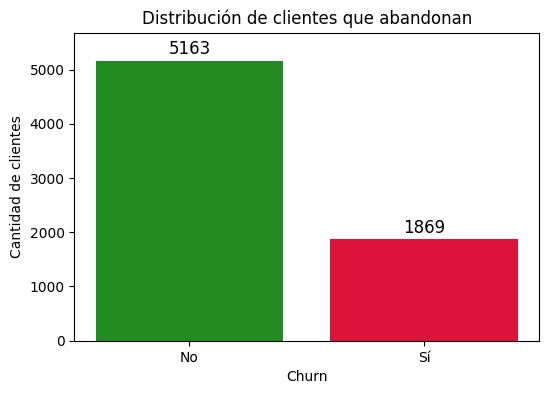

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de clientes para cada valor de churn (0 y 1)
churn_counts = df_relevante['churn'].value_counts().sort_index()

# Mapeo para mostrar "No" y "Sí" en el eje X
labels = ['No', 'Sí']

abandonan = churn_counts[1]
total = churn_counts.sum()
print(f"Porcentaje de clientes que abandonan: {abandonan/total*100:.2f}%")

# Crear el gráfico de barras
plt.figure(figsize=(6,4))
bars = plt.bar(labels, churn_counts.values, color=['forestgreen', 'crimson'])

# Añadir valores numéricos encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50,  # 50 para separar un poco el texto de la barra
             f'{int(height)}', ha='center', va='bottom', fontsize=12)

plt.title('Distribución de clientes que abandonan')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.ylim(0, churn_counts.max()*1.1)  # un poco de espacio arriba para texto

plt.show()

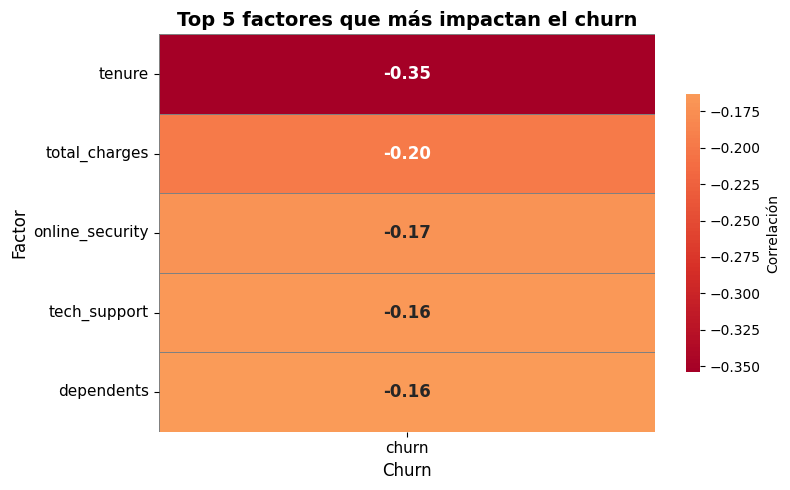

In [87]:
# Calcular la matriz de correlación solo para variables numéricas
corr_matrix = df_relevante.select_dtypes(include=['number']).corr()

# Calcular la correlación de todas las variables con churn (excluyendo la propia 'churn')
churn_corr = corr_matrix['churn'].drop('churn').sort_values(ascending=True)

# Seleccionar el top 5 factores más correlacionados con churn
top_5_vars = churn_corr.head(5)

# Preparar el DataFrame para heatmap (una sola columna: 'churn', filas: top 5 variables)
heatmap_data = top_5_vars.to_frame(name='churn')

plt.figure(figsize=(8, 5))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="RdYlGn",
    center=0,
    annot_kws={"size": 12, "weight": "bold"},
    fmt=".2f",
    linewidths=0.7,
    linecolor='grey',
    cbar_kws={"shrink": 0.7, "label": "Correlación"}
)
plt.title("Top 5 factores que más impactan el churn", fontsize=14, weight='bold')
plt.xlabel("Churn", fontsize=12)
plt.ylabel("Factor", fontsize=12)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2924311801.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_labels, y=churn_counts.values, ax=axes[i], palette=palette)
/tmp/ipython-input-2924311801.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_labels, y=churn_counts.values, ax=axes[i], palette=palette)
/tmp/ipython-input-2924311801.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_labels, y=churn_counts.values, ax=axes[i], palette=palette)


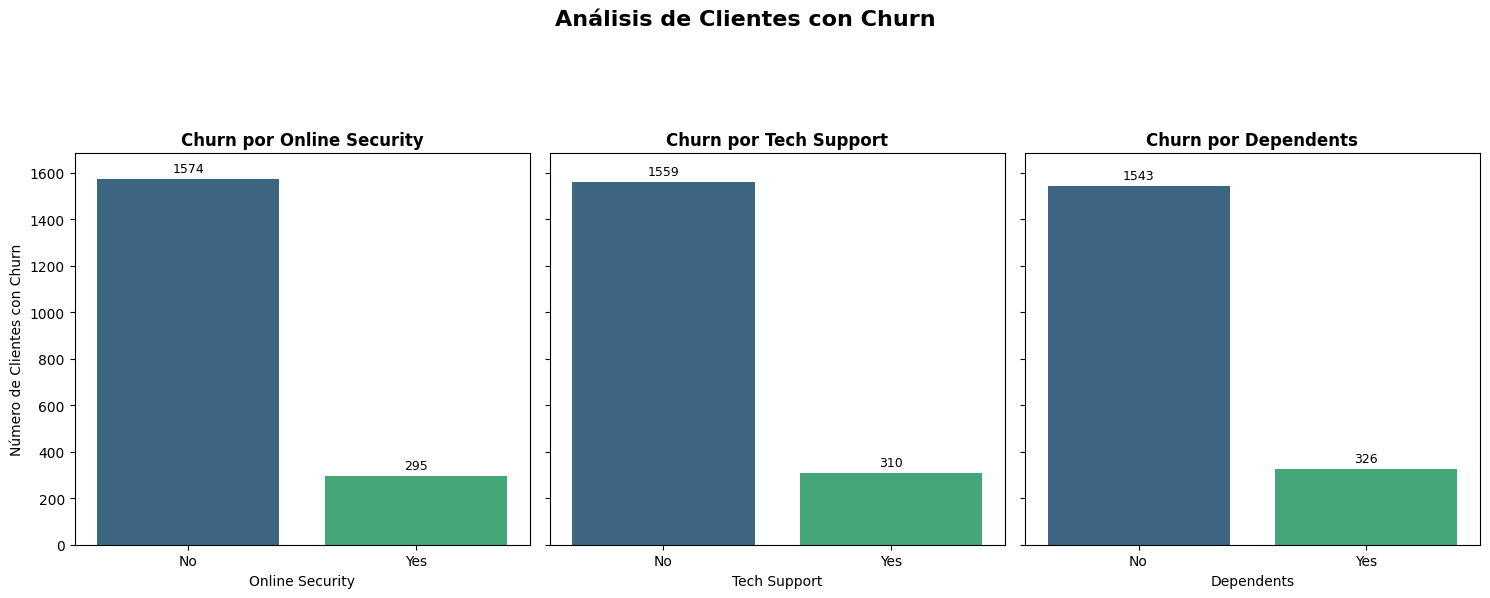

In [88]:
# Aunque df.info() muestra que no hay nulos, es una buena práctica defensiva.
df_relevante['total_charges'] = pd.to_numeric(df_relevante['total_charges'], errors='coerce')
df_relevante.dropna(subset=['total_charges'], inplace=True)

# Asegurar que 'churn' sea numérico, si no lo fuera ya.
df_relevante['churn'] = pd.to_numeric(df_relevante['churn'], errors='coerce')


# Filtrar el DataFrame para incluir solo los clientes que tuvieron Churn = 1
churned_df = df_relevante[df_relevante['churn'] == 1].copy()

# Definir las variables a graficar, utilizando los nombres exactos de tus columnas.
# Se ha excluido 'total_charges' según tu solicitud.
variables_to_plot = ['online_security', 'tech_support', 'dependents']

# Definir una paleta de colores para una visualización consistente
palette = "viridis"

# Crear una figura y un conjunto de subplots. 'sharey=True' asegura que todos los gráficos compartan el mismo eje Y.
fig, axes = plt.subplots(1, len(variables_to_plot), figsize=(15, 6), sharey=True) # Ajustar figsize
axes = axes.flatten() # Aplanar el array de axes para una fácil iteración

# Inicializar una variable para rastrear el conteo máximo de churn en todos los gráficos,
# lo que ayudará a establecer un límite común en el eje Y.
max_churn_count = 0

# Iterar sobre cada variable para crear un gráfico de barras
for i, col in enumerate(variables_to_plot):
    # Para variables categóricas (como online_security, tech_support, dependents),
    # mapear 0 a 'No' y 1 a 'Yes' para una mejor legibilidad en el gráfico.
    # Luego contar las ocurrencias de cada categoría.
    churn_counts = churned_df[col].map({0: 'No', 1: 'Yes'}).value_counts().sort_index()
    x_labels = churn_counts.index

    # Crear el gráfico de barras usando Seaborn
    sns.barplot(x=x_labels, y=churn_counts.values, ax=axes[i], palette=palette)

    # Añadir el valor encima de cada barra
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.0f', fontsize=9, padding=3)

    # Establecer el título y las etiquetas de los ejes para cada subplot
    # Reemplazar guiones bajos por espacios en el título para una mejor presentación
    axes[i].set_title(f'Churn por {col.replace("_", " ").title()}', fontsize=12, weight='bold')
    axes[i].set_xlabel(col.replace("_", " ").title(), fontsize=10)
    axes[i].set_ylabel('Número de Clientes con Churn', fontsize=10)

    # Rotar las etiquetas del eje X para evitar superposiciones y mejorar la legibilidad
    plt.setp(axes[i].get_xticklabels(), rotation=0, ha="center") # Ajustar rotación y alineación

    # Actualizar el conteo máximo de churn si el conteo actual es mayor
    if churn_counts.max() > max_churn_count:
        max_churn_count = churn_counts.max()

# Establecer un límite superior común para el eje Y en todos los subplots.
# Se añade un 7% de margen para que las barras no toquen el borde superior del gráfico.
for ax in axes:
    ax.set_ylim(0, max_churn_count * 1.070) # Aumentar el margen para las etiquetas

# Añadir un título principal a toda la figura
plt.suptitle('Análisis de Clientes con Churn', fontsize=16, weight='bold', y=1.02)

# Ajustar el diseño para asegurar que los títulos y etiquetas no se superpongan
plt.tight_layout(rect=[0, 0.03, 1, 0.9]) # El rect ajusta el espacio para el suptitle
plt.show()


/tmp/ipython-input-2273068757.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(churned_total_charges, kde=True, bins=30, palette='viridis', line_kws={'linewidth': 2}, ax=axes[0])
/tmp/ipython-input-2273068757.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=churned_total_charges, palette='viridis', ax=axes[1])


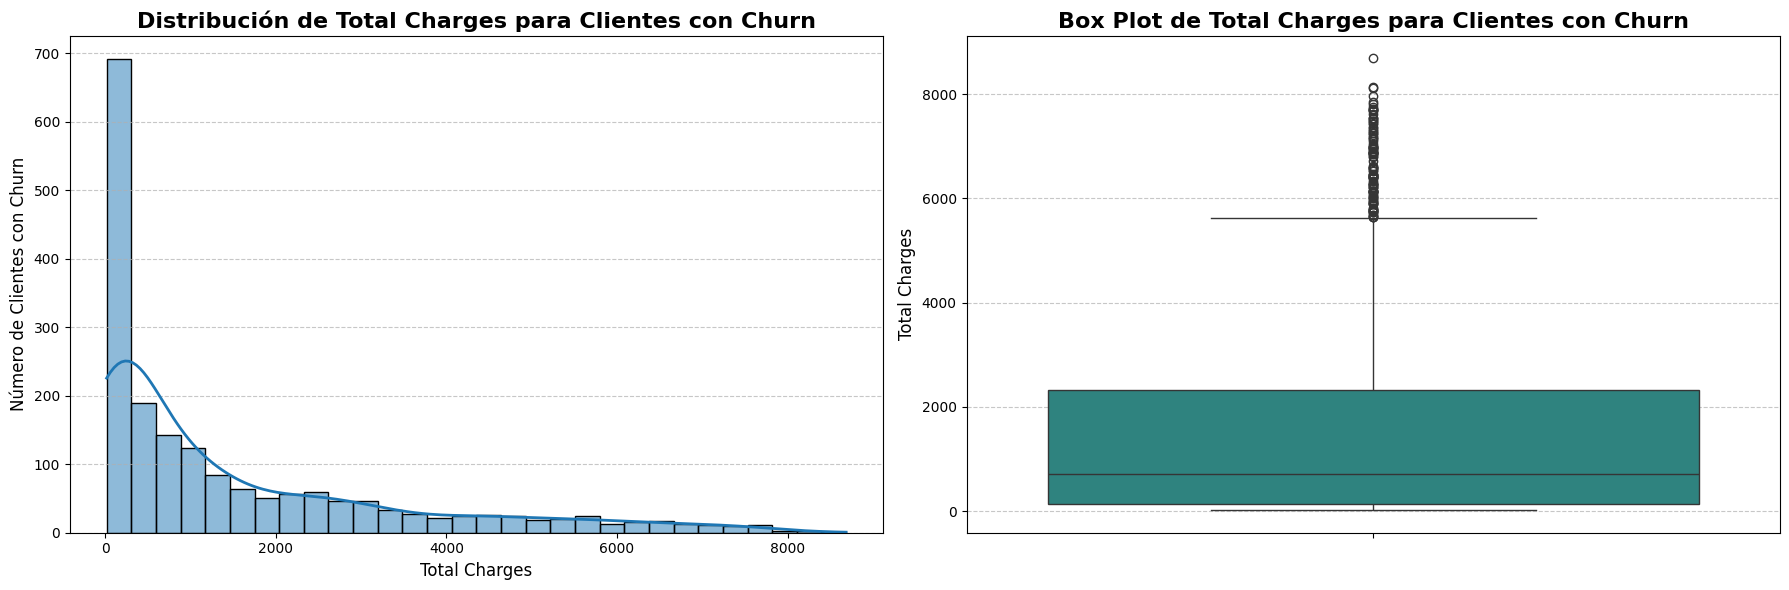

In [89]:
# Filtrar el DataFrame para incluir solo los clientes que tuvieron Churn = 1
churned_total_charges = df_relevante[df_relevante['churn'] == 1]['total_charges']

# --- Visualización de total_charges para Clientes con Churn (Histograma y Box Plot lado a lado) ---
# Crear una figura con dos subplots: 1 fila, 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(18, 6)) # Ajustar figsize para dos plots lado a lado

# Histograma de total_charges para Clientes con Churn (en el primer subplot)
sns.histplot(churned_total_charges, kde=True, bins=30, palette='viridis', line_kws={'linewidth': 2}, ax=axes[0])
axes[0].set_title('Distribución de Total Charges para Clientes con Churn', fontsize=16, weight='bold')
axes[0].set_xlabel('Total Charges', fontsize=12)
axes[0].set_ylabel('Número de Clientes con Churn', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Box Plot de total_charges para Clientes con Churn (en el segundo subplot)
sns.boxplot(y=churned_total_charges, palette='viridis', ax=axes[1])
axes[1].set_title('Box Plot de Total Charges para Clientes con Churn', fontsize=16, weight='bold')
axes[1].set_ylabel('Total Charges', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout() # Ajustar el diseño para que los subplots no se superpongan
plt.show()

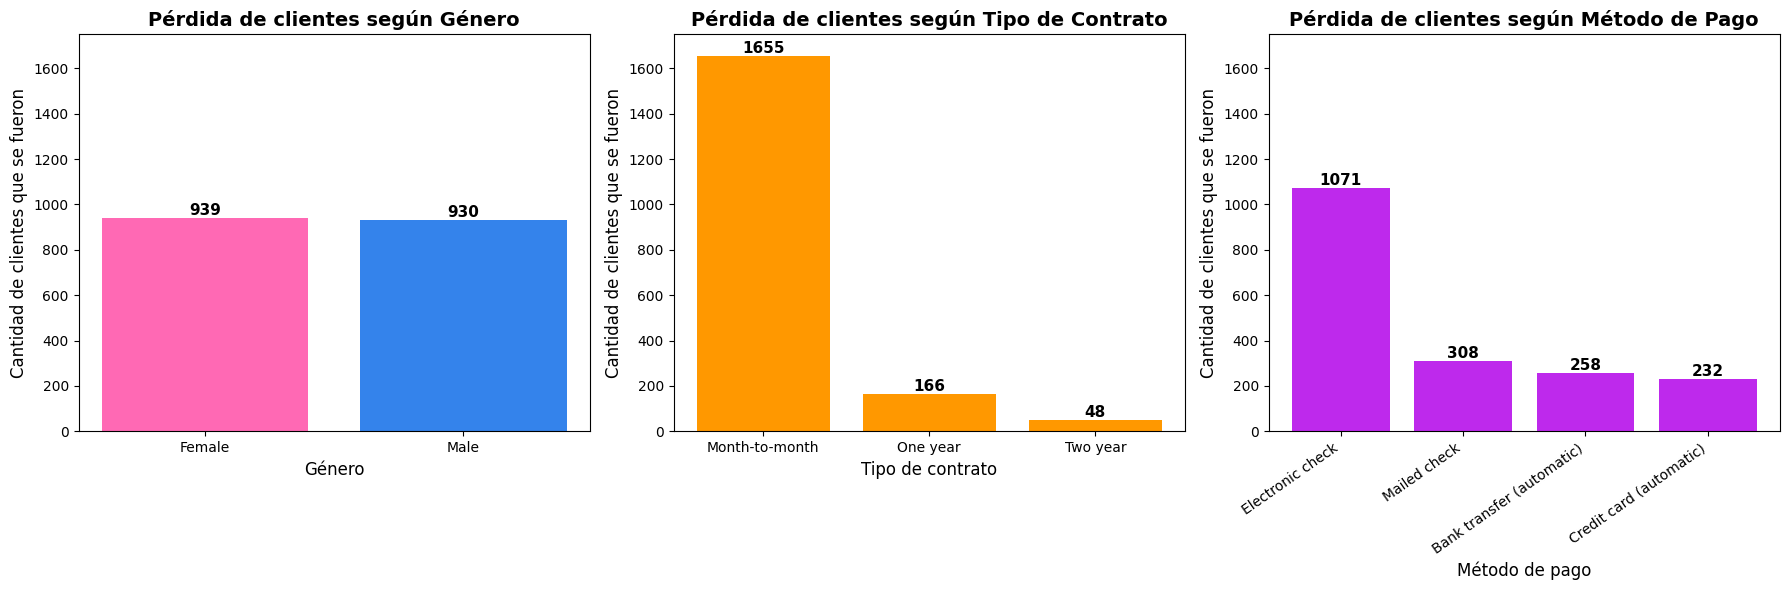

In [90]:
import matplotlib.pyplot as plt

graficos_info = {'gender': {'colores': {'Male': '#3483eb', 'Female': '#ff69b4'},
        'titulo': 'Pérdida de clientes según Género',
        'xlabel': 'Género'},
    'contract': {'color': '#ff9800',  # Naranja
        'titulo': 'Pérdida de clientes según Tipo de Contrato',
        'xlabel': 'Tipo de contrato'},
    'payment_method': {'color': '#be29ec',  # Fucsia/violeta
        'titulo': 'Pérdida de clientes según Método de Pago',
        'xlabel': 'Método de pago'}}

categoricas = ['gender', 'contract', 'payment_method']

plt.figure(figsize=(18, 6))

for i, col in enumerate(categoricas, 1):
    plt.subplot(1, len(categoricas), i)
    data_churn = df_relevante[df_relevante['churn'] == 1]
    conteos = data_churn[col].value_counts().sort_values(ascending=False)

    if col == 'gender':
        colores_barras = [graficos_info['gender']['colores'].get(cat, '#3483eb') for cat in conteos.index]
        bars = plt.bar(conteos.index, conteos.values, color=colores_barras)
    else:
        bars = plt.bar(conteos.index, conteos.values, color=graficos_info[col]['color'])

    for bar in bars:
        altura = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            altura ,  # ajusta este valor si ves que se superpone
            f'{int(altura)}',
            ha='center', va='bottom', fontsize=11, weight='bold'
        )
    plt.title(graficos_info[col]['titulo'], fontsize=14, weight='bold')
    plt.xlabel(graficos_info[col]['xlabel'], fontsize=12)
    plt.ylabel('Cantidad de clientes que se fueron', fontsize=12)
    plt.ylim(0, 1750)  # ¡Aquí se fija el mismo máximo de y para todos!
    if col == 'payment_method':
        plt.xticks(rotation=35, ha='right')
    else:
        plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


#Pérdida de clientes por **Variables numéricas**

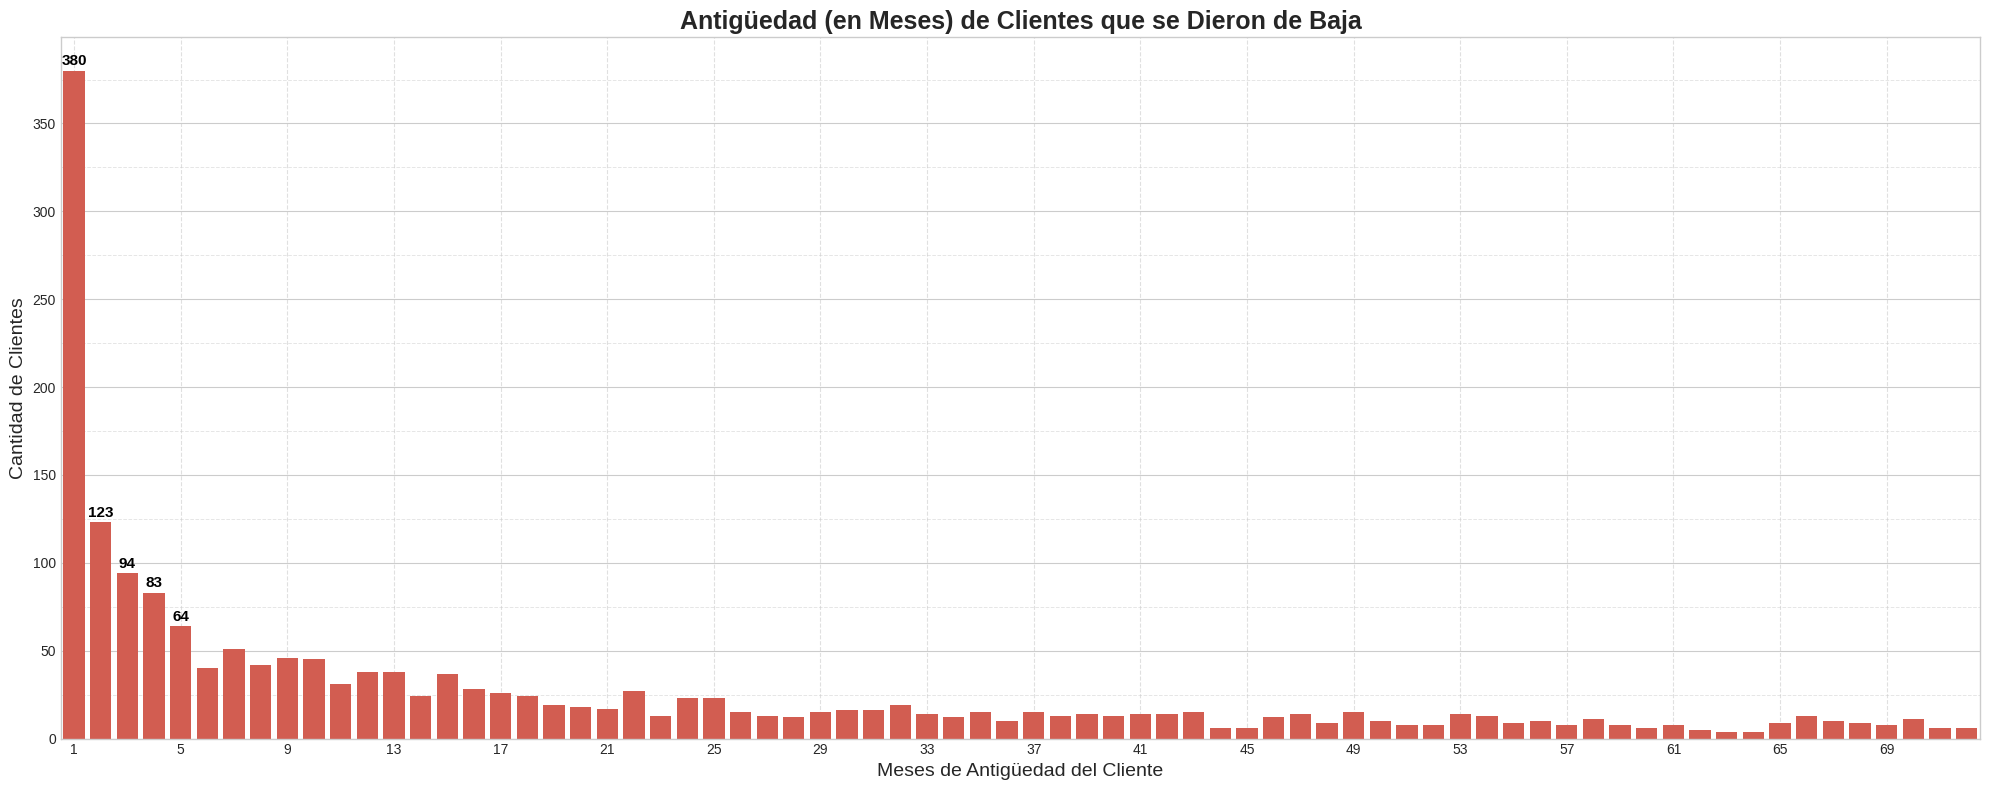

In [91]:
import matplotlib.ticker as ticker

# 1. Filtrar solo los clientes que se fueron (churn == 1)
data_churn = df_relevante[df_relevante['churn'] == 1].copy()

# 2. Contar clientes por cada mes de antigüedad (tenure)
# Se aplica value_counts() directamente a la columna 'tenure'
# .sort_index() es crucial para que los meses se ordenen de menor a mayor
tenure_counts = data_churn['tenure'].value_counts().sort_index()

# 3. Identificar los 5 meses con la mayor cantidad de bajas
top_5_counts = tenure_counts.nlargest(5)

# 4. Graficar los resultados
# Aumentamos el tamaño del gráfico para que quepan todos los meses
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(20, 8))

# Creamos el gráfico de barras. El eje X ahora son los meses individuales.
sns.barplot(x=tenure_counts.index, y=tenure_counts.values, ax=ax, color='#e74c3c')

# 5. Añadir el monto encima de las 5 barras más altas
for p in ax.patches:
    height = p.get_height()
    # Comprobamos si la altura de la barra está en los valores del top 5
    if height in top_5_counts.values:
        ax.text(
            x=p.get_x() + p.get_width() / 2, # Posición X (en el centro de la barra)
            y=height + 3,                    # Posición Y (un poco encima de la barra)
            s=f'{int(height)}',              # El texto a mostrar (el número)
            ha='center',                     # Alineación horizontal
            size=11,
            weight='bold',
            color='black'
        )

# 6. Configurar títulos y etiquetas en español (actualizados para meses)
ax.set_title('Antigüedad (en Meses) de Clientes que se Dieron de Baja', fontsize=18, weight='bold')
ax.set_xlabel('Meses de Antigüedad del Cliente', fontsize=14)
ax.set_ylabel('Cantidad de Clientes', fontsize=14)

# 7. Ajustar las etiquetas del eje X para que sean legibles
# Puede que necesites ajustar el 'step' si el gráfico se ve muy denso
step = 4 # Muestra una etiqueta cada 2 meses
ax.set_xticks(range(0, len(tenure_counts.index), step))
ax.set_xticklabels(tenure_counts.index[::step])
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Líneas de grid secundarias horizontales, punteadas, más frecuentes
ymin, ymax = ax.get_ylim()
secondary_ticks = [i for i in range(25, int(ymax)+1, 50)]
ax.set_yticks(secondary_ticks, minor=True)
ax.grid(axis='y', which='minor', linestyle='--', linewidth=0.7, alpha=0.5)

plt.tight_layout()
plt.show()


/tmp/ipython-input-1313355312.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tenure_counts.index, y=tenure_counts.values, ax=ax, palette='viridis')


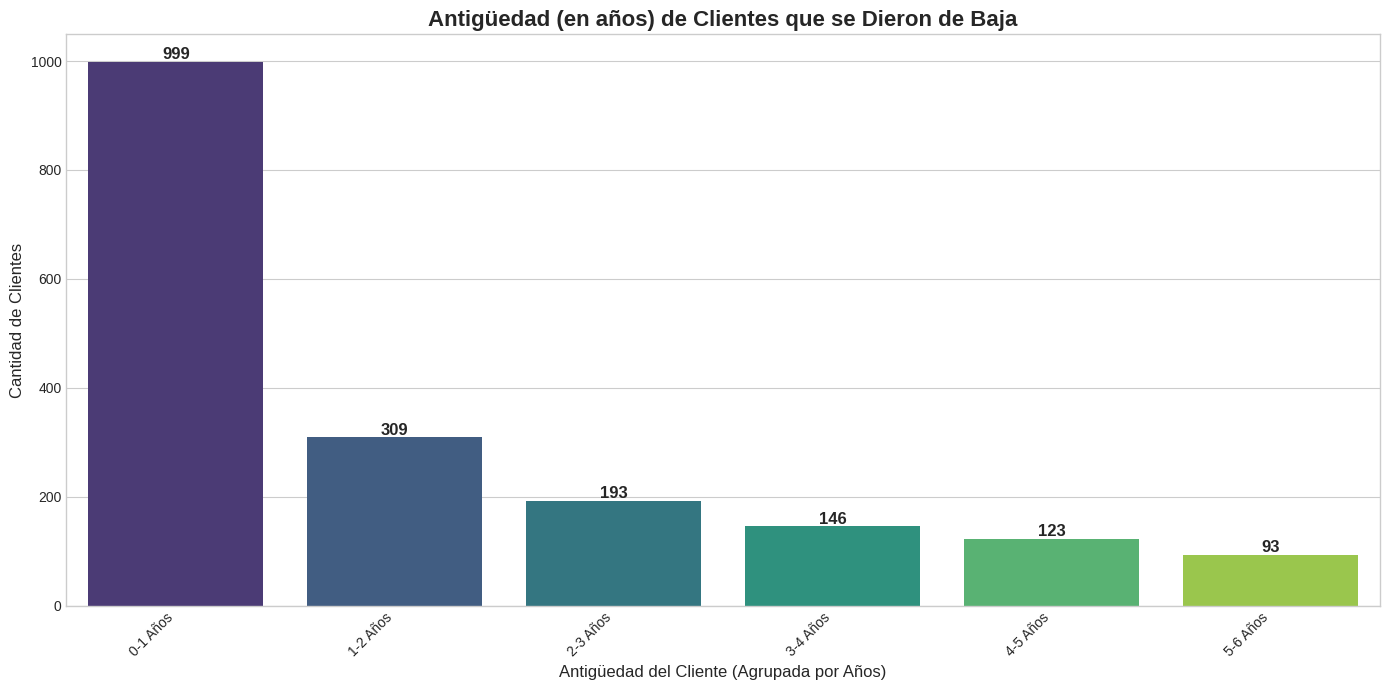

In [92]:
# Usamos .copy() para evitar advertencias de pandas
data_churn = df_relevante[df_relevante['churn'] == 1].copy()

# 2. Agrupar la antigüedad (tenure) en rangos anuales
# Definimos los límites de los rangos (bins) cada 12 meses
max_tenure = data_churn['tenure'].max()
bins = list(range(0, max_tenure + 12, 12))
# Asegurarnos de que el primer bin empiece en 0 si hay clientes con tenure 0
if 0 not in bins:
    bins.insert(0, 0)
# Creamos etiquetas para cada rango
labels = [f'{i}-{i+1} Años' for i in range(len(bins)-1)]

# Creamos una nueva columna con los grupos de antigüedad
data_churn['tenure_group'] = pd.cut(data_churn['tenure'], bins=bins, labels=labels, right=False, include_lowest=True)

# 3. Contar clientes por cada grupo de antigüedad y ordenar por el grupo
tenure_counts = data_churn['tenure_group'].value_counts().sort_index()

# 4. Identificar los 5 grupos con más clientes
top_5_counts = tenure_counts.nlargest(6)

# 5. Graficar los resultados
plt.style.use('seaborn-v0_8-whitegrid') # Estilo visualmente agradable
fig, ax = plt.subplots(figsize=(14, 7))

# Creamos el gráfico de barras con Seaborn
sns.barplot(x=tenure_counts.index, y=tenure_counts.values, ax=ax, palette='viridis')

# 6. Añadir el monto encima de las 5 barras más altas
for p in ax.patches:
    height = p.get_height()
    # Comprobamos si la altura de la barra está en los valores del top 5
    if height in top_5_counts.values:
        ax.text(
            x=p.get_x() + p.get_width() / 2, # Posición X (en el centro de la barra)
            y=height + 5,                    # Posición Y (un poco encima de la barra)
            s=f'{int(height)}',              # El texto a mostrar (el número)
            ha='center',                     # Alineación horizontal
            size=12,
            weight='bold'
        )

# 7. Configurar títulos y etiquetas en español
ax.set_title('Antigüedad (en años) de Clientes que se Dieron de Baja', fontsize=16, weight='bold')
ax.set_xlabel('Antigüedad del Cliente (Agrupada por Años)', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje X para mejor lectura
plt.tight_layout() # Ajustar el gráfico para que todo encaje
plt.show()

In [93]:
import warnings
warnings.filterwarnings("ignore")

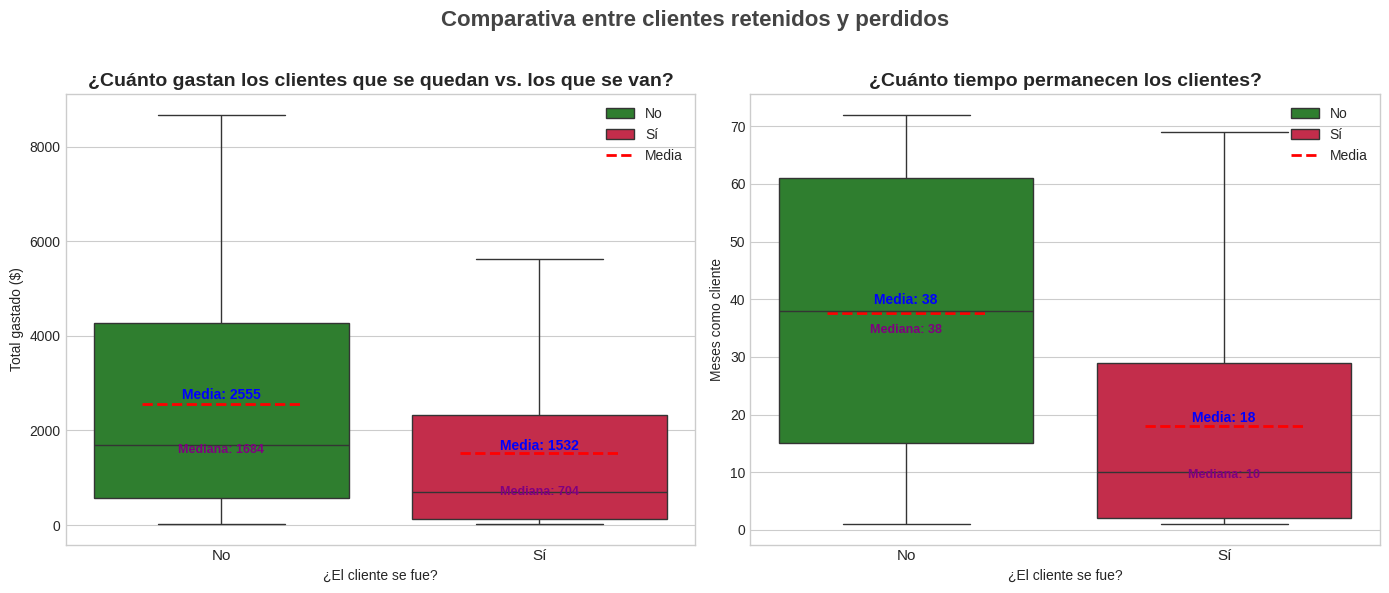

In [94]:
# Definir paleta personalizada
palette = {0: "forestgreen", 1: "crimson"}
labels_map = {0: 'No', 1: 'Sí'}

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Total Gastado
sns.boxplot(x='churn', y='total_charges', data=df_relevante,
    hue='churn', palette=palette, dodge=False, ax=axes[0], showfliers=False)

axes[0].set_title('¿Cuánto gastan los clientes que se quedan vs. los que se van?', fontsize=14, weight='bold')
axes[0].set_xlabel('¿El cliente se fue?')
axes[0].set_ylabel('Total gastado ($)')
axes[0].set_xticklabels([labels_map[i] for i in sorted(df_relevante['churn'].unique())], fontsize=11)

# Gráfico 2: Tiempo de Contrato
sns.boxplot(
    x='churn', y='tenure', data=df_relevante,
    hue='churn', palette=palette, dodge=False, ax=axes[1], showfliers=False
)
axes[1].set_title('¿Cuánto tiempo permanecen los clientes?', fontsize=14, weight='bold')
axes[1].set_xlabel('¿El cliente se fue?')
axes[1].set_ylabel('Meses como cliente')
axes[1].set_xticklabels([labels_map[i] for i in sorted(df_relevante['churn'].unique())], fontsize=11)

# Agregar medias, medianas y líneas guía en ambos gráficos
for ax, col, ylabel in zip(axes, ['total_charges', 'tenure'], ['Total gastado', 'Meses']):
    for i, grupo in enumerate(sorted(df_relevante['churn'].unique())):
        data = df_relevante[df_relevante['churn'] == grupo][col]
        media = data.mean()
        mediana = data.median()
        # Línea horizontal de la media
        ax.hlines(media, i-0.25, i+0.25, colors='red', linestyles='--', linewidth=2, label='Media' if i==0 else "")
        # Etiqueta con la media
        ax.text(i, media + 0.04*media, f'Media: {media:.0f}', ha='center', color='blue', weight='bold', fontsize=10)
        # Etiqueta con la mediana
        ax.text(i, mediana - 0.1*mediana, f'Mediana: {mediana:.0f}', ha='center', color='purple', weight='bold', fontsize=9)
    # Solo mostrar una leyenda
    handles, labels = ax.get_legend_handles_labels()

    ax.legend(handles[:2]+[handles[-1]], ['No', 'Sí', 'Media'], loc='upper right')

plt.suptitle('Comparativa entre clientes retenidos y perdidos', fontsize=16, weight='bold', color='#444')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

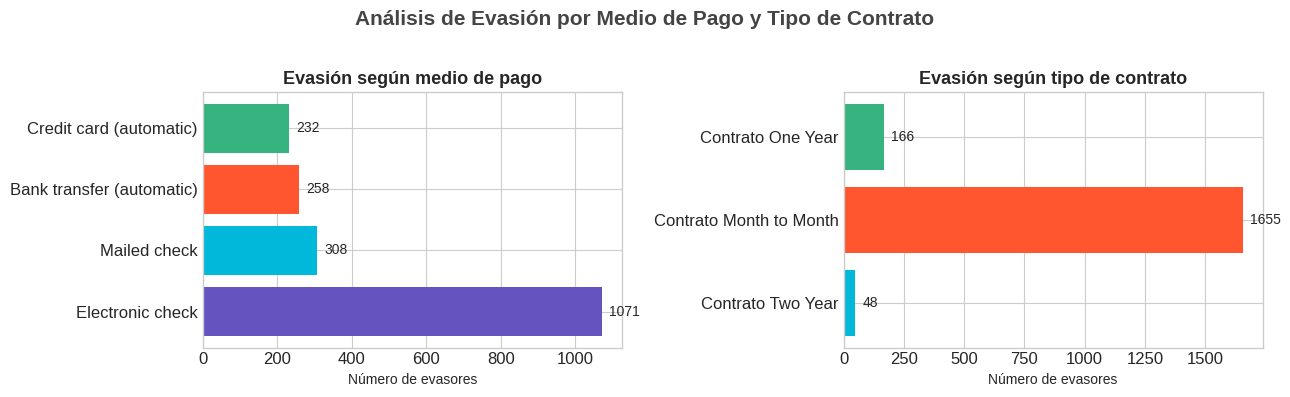

In [95]:
# Paleta de colores elegantes y temáticos (verde, rojo, celeste, violeta)
colores = ['#36b37e', '#ff5630', '#00b8d9', '#6554c0']

# Calcular evasores por método de pago
df_totales = (
    df_relevante[df_relevante['churn'] == 1]['payment_method']
    .value_counts()
    .sort_values(ascending=True)
)

# Calcular evasores por tipo de contrato (en el orden deseado)
contrato_orden = ['One year', 'Month-to-month', 'Two year']
valores_contrato = (
    df_relevante[df_relevante['churn'] == 1]['contract']
    .value_counts()
    .reindex(contrato_orden)
    .fillna(0)
    .astype(int)
    .tolist()
)
labels_contrato = ['Contrato One Year', 'Contrato Month to Month', 'Contrato Two Year']
colores_contrato = colores[:3]

# --- GRÁFICOS ---
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
fig.subplots_adjust(wspace=0.35)

# Gráfico Izquierda: Medios de pago
bars_pago = axs[0].barh(df_totales.index, df_totales, color=colores[:len(df_totales)])
axs[0].bar_label(bars_pago, fmt='%d', padding=5)
axs[0].set_title('Evasión según medio de pago', fontsize=13, weight='bold')
axs[0].set_xlabel('Número de evasores')
axs[0].set_ylabel('')
axs[0].xaxis.set_tick_params(labelsize=12)
axs[0].yaxis.set_tick_params(labelsize=12)
axs[0].invert_yaxis()

# Gráfico Derecha: Tipo de contrato
bars_contrato = axs[1].barh(labels_contrato, valores_contrato, color=colores_contrato)
axs[1].bar_label(bars_contrato, fmt='%d', padding=5)
axs[1].set_title('Evasión según tipo de contrato', fontsize=13, weight='bold')
axs[1].set_xlabel('Número de evasores')
axs[1].set_ylabel('')
axs[1].xaxis.set_tick_params(labelsize=12)
axs[1].yaxis.set_tick_params(labelsize=12)
axs[1].invert_yaxis()

plt.suptitle('Análisis de Evasión por Medio de Pago y Tipo de Contrato', fontsize=15, weight='bold', color='#444')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Extracción de datos para parte dos:

In [96]:
df_relevante.to_csv("datos_tratados.csv", index=False)

#📄Informe final

# 📊 Análisis de Abandono de Clientes (Churn):

---

## 🚀 Resumen Ejecutivo

Este informe profundiza en los motivos detrás de la **deserción de clientes (churn)** en una empresa de telecomunicaciones. Comprender el churn es crucial, ya que impacta directamente en los ingresos y es un claro indicador de la satisfacción del cliente y la efectividad de las estrategias de fidelización.

> **Propósito Central:**
> El objetivo primordial de este estudio es identificar patrones y perfiles de clientes con alta probabilidad de cancelar su servicio, proporcionando a la empresa información accionable para prevenir la rotación y optimizar sus estrategias de retención.

---

## ⚙️ Preparación y Preprocesamiento de Datos

La información inicial, obtenida de un archivo JSON, fue sometida a un riguroso proceso de limpieza y preparación:

- Se transformaron los valores de las columnas numéricas que se encontraban en formato de texto a tipos de datos apropiados.
- Se eliminaron los registros incompletos o con información ausente para asegurar la integridad del conjunto de datos.
- Se unificaron y estandarizaron las categorías en variables clave como `churn`, `gender`, y `payment_method`, entre otros.
- Los indicadores binarios de "Sí" y "No" se convirtieron a una representación numérica estándar (`0` y `1`) para facilitar el análisis.

Estas acciones garantizan una base de datos robusta y fiable para las siguientes fases del análisis.

---

## 📈 Exploración de Datos: Hallazgos Clave

### 📉 Tasa General de Deserción

Se determinó que aproximadamente el **26.58%** de la base de clientes ha optado por cancelar su servicio, mientras que el porcentaje restante mantiene su relación con la empresa.

### 🚻 Influencia del Género en el Churn

El análisis por género reveló que **no existen diferencias significativas** en las tasas de deserción entre hombres y mujeres, lo que sugiere que el género no es un factor determinante en la decisión de cancelar el servicio.

### 📝 Impacto del Tipo de Contrato en el Churn

Un hallazgo notable es la **elevada tasa de churn entre clientes con contratos de modalidad mensual**. Este segmento exhibe una menor lealtad o satisfacción, en contraste con los clientes con contratos anuales, que muestran una propensión mucho menor a la deserción.

### 💳 Preferencias de Pago y Churn

Los clientes que utilizan el **"cheque electrónico"** como método de pago predominante presentan una **incidencia de churn considerablemente superior** en comparación con aquellos que emplean otras formas de pago como transferencias bancarias o tarjetas de crédito.

### 💲 Análisis de Variables Cuantitativas

- **Total Acumulado de Pagos (`total_charges`)**:
  Los clientes que deciden irse de la empresa generalmente tienen un **historial de gasto acumulado inferior**. Esto sugiere que muchos abandonan el servicio poco después de haberlo iniciado, antes de acumular grandes montos.
- **Antigüedad del Contrato (`tenure`)**:
  Confirmando la observación anterior, la mayoría de los clientes que churnean exhiben un **período de permanencia más corto** con la empresa.

> Se incorporaron las medias en los diagramas de caja (boxplots) para visualizar y reforzar estas correlaciones.

---

## 🎯 Conclusiones y Perfiles de Riesgo

- Existe una fuerte correlación entre la **baja antigüedad del contrato** y la probabilidad de churn.
- Los clientes con **contratos mensuales** y aquellos que pagan mediante **cheque electrónico** representan segmentos de alto riesgo de deserción.
- La **variable de género** no se perfila como un factor diferenciador en la tasa de churn.
- Un **menor monto total gastado** por el cliente se asocia directamente con una mayor probabilidad de cancelación, evidenciando una falta de fidelización temprana.

---

## 💡 Estrategias Recomendadas

1.  **Promoción de Compromisos a Largo Plazo**: Diseñar incentivos (descuentos, beneficios exclusivos) que motiven a los clientes a optar por contratos de mayor duración.
2.  **Optimización de la Experiencia Inicial**: Implementar programas de acompañamiento y soporte robustos durante los primeros meses del cliente, un período crítico para la retención.
3.  **Evaluación del Proceso de Pago Electrónico**: Realizar un análisis exhaustivo del flujo de pago con cheque electrónico para identificar y mitigar posibles puntos de frustración o insatisfacción.
4.  **Campañas de Retención Dirigidas**: Desarrollar e implementar acciones de retención específicas para clientes identificados con baja antigüedad (`tenure`) y bajos montos de `total_charges`.
5.  **Investigación de Motivos de Cancelación**: Diseñar e implementar encuestas de salida o entrevistas dirigidas a clientes recientes que han churneado para obtener información detallada sobre las razones de su baja.